In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Explore Databases

In [17]:
inspector = inspect(engine)

In [18]:
#get measurement column names and type
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
#get station column names and type
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-23


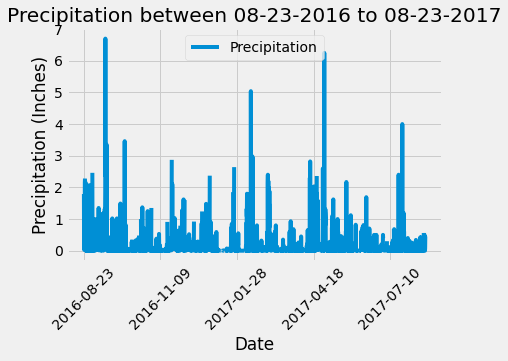

<Figure size 3600x432 with 0 Axes>

In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
#for data in prcp_data:
    #print(data)

column_names = ['Date', 'Precipitation']
prcp_df = pd.DataFrame(prcp_data, columns = column_names)



# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = 'Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x = 'Date', y = 'Precipitation', kind = 'line')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.xticks(rotation = 45)
plt.title('Precipitation between 08-23-2016 to 08-23-2017')
plt.figure(figsize = (50,6))
plt.show()


In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
sum_stats = prcp_df.describe()
sum_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [65]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station, func.count(Measurement.date)]
most_active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, 
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
tempSum_active_station = session.query(*sel).\
       filter(Measurement.station == 'USC00519281').\
       group_by(Measurement.station).\
       order_by(Measurement.station).all()

tempSum_active_station



[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [186]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

recent_date_station = session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()

recent_date = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print("Station Recent Date: ", recent_date)


sel = [Measurement.date, Measurement.tobs]
temp_obs_12months = session.query(*sel).\
    filter(func.strftime(Measurement.date >= recent_date)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

 #create a dataframe    
column_names2 = ['Date', 'Temperature']
temp_obs_12months_df = pd.DataFrame(temp_obs_12months, columns = column_names2)

temp_obs_12months_df

temp_obs_12months




Station Recent Date:  2016-08-18


[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

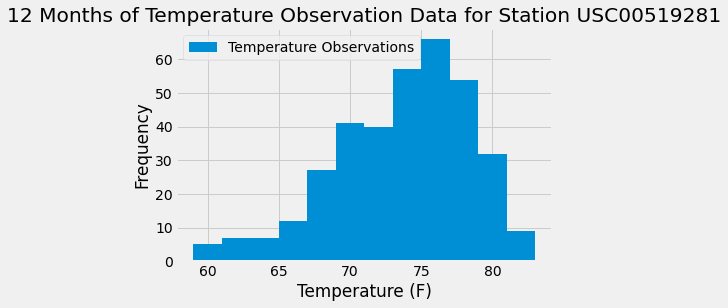

In [126]:
#plot histogram
temp_obs_12months_df.hist(bins = 12, label = 'Temperature Observations')
#plt.hist(temp_obs_12months_df['Temperature'], bins = 12, label = 'Temperature Observations')
plt.legend()
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('12 Months of Temperature Observation Data for Station USC00519281')
plt.show()

# Close Session

In [127]:
# Close Session
session.close()